<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regressino_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression inputs and outputs

Inputs -> Machine learning algorithm -> Outputs

## What is Regression problem ?

If you are planning to predict a house price with available variables like number of rooms , bathrooms, squarefoot etc, then you are dealing with a regression problem.

## How are you going to solve it ?

Understand inputs (independent variable) and outputs (dependent variables).

Inputs features can be number of rooms, bathrooms etc. Try creating a data using one-hot encoding (which is learnt earlier).  Looks if someone has already created a machine learning algorithm (for example supervised learning algorithm) for your problem online. If you cant find you can implement by yourself. Finally output can be a price predicted of the house from the inputs you shared through iput.

Here numerical encoding of indepedent variables in the form of tensor.

# Anatomy of Neural Networks (NN)

Input layers -> Hidde layers -> Output layers

With hidden layers, the neural network learns the pattern.

## What does the NN regression algorithm look like ?

Hyper Parameters we need to consdier are


1. Input layer shape
2. Hidden layer(s)
3. Neurons per hidden layer
4. Output layer shape
5. Hidden activation
6. Output activation
7. Loss function
8. Optimizer


## Here in this Housing problem
1. Input layers are number of bathrooms, rooms etc.
2. Hidden layers: Problem specific 1 to unlimited
3. Neurons per hidden layer: generally 0 to 100
4. Output layer shape : same shape as desired prediction shape (eg. 1 for house price)
5. Hidden activation : Usually ReLU (Rectified Linear unit).
6. Output activation : None, ReLu , logistic/tanh
7. Loss function: MSE (Mean square error) or MAE  (Mean absolute error) / Huber (Combination of MAE/MSE) if outliers
8. Optimizer : SGD stochastic gradient descent , Adam






# Introduction to Regressions with NN in tensor flow.

There are many definitions for a regression problem but in our case, we are going to simplify it. Predictig numerical variabel absed on some other combination of variabels even sorter predicting a number.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


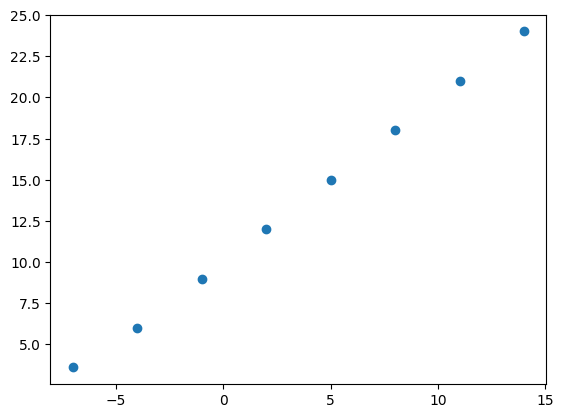

In [2]:
#Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.6, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#Visualize it
plt.scatter(X, y)

Lets try to work pattern between X and y

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([False,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [5]:
#Create Demo tensor for our housing price predictio problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
print(house_info)

house_price = tf.constant([939700])
print(house_price)

house_info.shape, house_price.shape

tf.Tensor([b'bedroom' b'bathroom' b'garage'], shape=(3,), dtype=string)
tf.Tensor([939700], shape=(1,), dtype=int32)


(TensorShape([3]), TensorShape([1]))

In [6]:
X[0], y[0]

(-7.0, 3.6)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.6)

##Turnig  Numpy Arrays into tensors

In [11]:

X = tf.cast(tf.constant(X),  dtype=tf.float32)
y = tf.cast(tf.constant(y),  dtype=tf.float32)
X = tf.reshape(X, shape=(8,1))
y = tf.reshape(y, shape=(8,1))
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

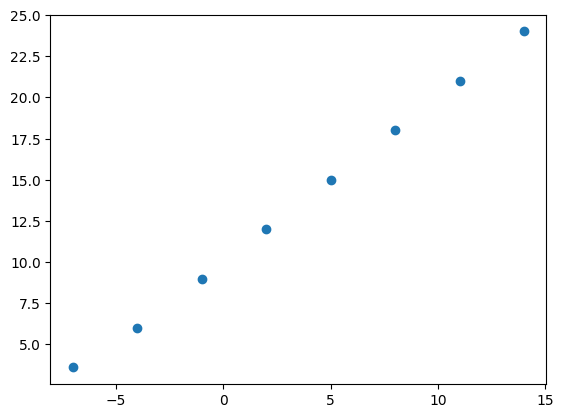

In [13]:
plt.scatter(X, y)

##Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our models how to improve the patterns its learning) and evalutation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find the patterns between x and y (Features and labels)

In [14]:
#Set random seed
tf.random.set_seed(42)

print(X)
#1. Create a model using the Sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mean absolute error : Comparision of prediction vs observed
              optimizer = tf.keras.optimizers.SGD(), #Stochastic radiant descent
              metrics = ["mae"])

#3.Fit the model
model.fit(X, y, epochs=5)


tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float32)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 14.6110 - mae: 14.6110
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - loss: 14.4785 - mae: 14.4785
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 14.3460 - mae: 14.3460
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 14.2135 - mae: 14.2135
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 14.0810 - mae: 14.0810


In [15]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [16]:
#Try predicting the model
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


array([[-2.0069132],
       [ 0.05     ]], dtype=float32)

In [17]:
#added prediction + mae
y_predict = y_predict + 10.7413
y_predict

array([[ 8.734386],
       [10.7913  ]], dtype=float32)

## Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization fucntion.
3. **Fitting a model** -Here we might fit model for more **epochs** (leave it training for long time)
  

In [18]:
#Lets rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.1267 - mae: 13.1267
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 12.2664 - mae: 12.2664
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 11.4103 - mae: 11.4103
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 10.5585 - mae: 10.5585
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 9.8113 - mae: 9.8113
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 9.1335 - mae: 9.1335
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 8.4288 - mae: 8.4288
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 7.6966 - mae: 7.6966
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 6.9368 - mae: 6.9368
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 6.1455 - mae: 6.1455
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 5.3198 - mae: 5.3198
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 4.4577 - mae: 4.4577
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [19]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[26.622036],
       [10.084599]], dtype=float32)

We were expecting value of y predicted is 27. Its almost near with an mae 0.2162 and loss : 0.2163. Lets try increasing layer and check

In [20]:
#Can we do better lets see
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.8830 - mae: 13.8830
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.6138 - mae: 13.6138
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 13.3739 - mae: 13.3739
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 13.1363 - mae: 13.1363
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.8963 - mae: 12.8963
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.6645 - mae: 12.6645
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.4347 - mae: 12.4347
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.2002 - mae: 12.2002
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.9593 - mae: 11.9593
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7205 - mae: 11.7205
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.4731 - mae: 11.4731
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 11.2088 - mae: 11.2088
Epoch 13/100
1/1 ━━━━━━━━

In [21]:
#Lets predict again
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[31.143518 ],
       [ 3.1700714]], dtype=float32)

Looks our model is overfitting it means it has learnt the data very well that is leading to a problem. It should be well balanced. Here the key hyper parameter we tweaked is learning rate apart from adding a new layer. Lets revert it back to 0.01 instead of 0.001 and see if the model predicts y value perfectly.

In [22]:
#Lets try with Adam learning rate 0.01 instead of 0.001

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.8244 - mae: 13.8244
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 11.3108 - mae: 11.3108
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.9354 - mae: 9.9354
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.4468 - mae: 8.4468
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.9510 - mae: 6.9510
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4.8795 - mae: 4.8795
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.2763 - mae: 4.2763
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.2826 - mae: 5.2826
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5.9064 - mae: 5.9064
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.0058 - mae: 6.0058
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.7183 - mae: 5.7183
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 5.1620 - mae: 5.1620
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms

In [23]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[28.1206  ],
       [10.060754]], dtype=float32)

Tried with 3 dense layers still the model was overfitting slightly so reduced one layer and learning rate 0.01, it predicts fine.

##Evaluating the model
Typical flow is like
1. Create Model
2. Compile Model
3. Fit Model
4. Predict
5. Tweak the Model by changing hyper parameters.
6. Repeat 1 to 4

When Evaluating the models we always need to **visualize**.

*Visualize the data : What data are we working with. What does it look like.
*Visualize the model :What does our model look like ?
*Visualize the training model : How does the model perform while it learns
*Visualize predictions of the model: How do the predictions of a model line up against the ground truth (the original labels).



In [24]:
#Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

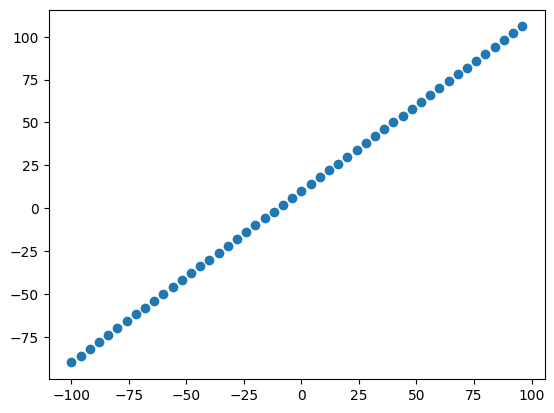

In [26]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

###The concepts of 3 sets
***Set-1: Training Set*** : Model learns from this data (70 to 80% of the total we have available). Analogy is your course material.

***Set-2 : Validation set*** : Models gets tuned on this data, which is typically 10 to 15% of data available. Analogy is practice exam

***Set-3 : Test set*** : The model gets evaluated on this data to test what has learned, this set is typically 10-15% of the total data vailable. Analogy is Final exam.

In [27]:
#Check the lenght of how many samples we have
len(X)

50

In [28]:
#Split the data into train and test sets
X_train = X[:40] #First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  #Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we have got our data in training and test sets. Lets visualize again

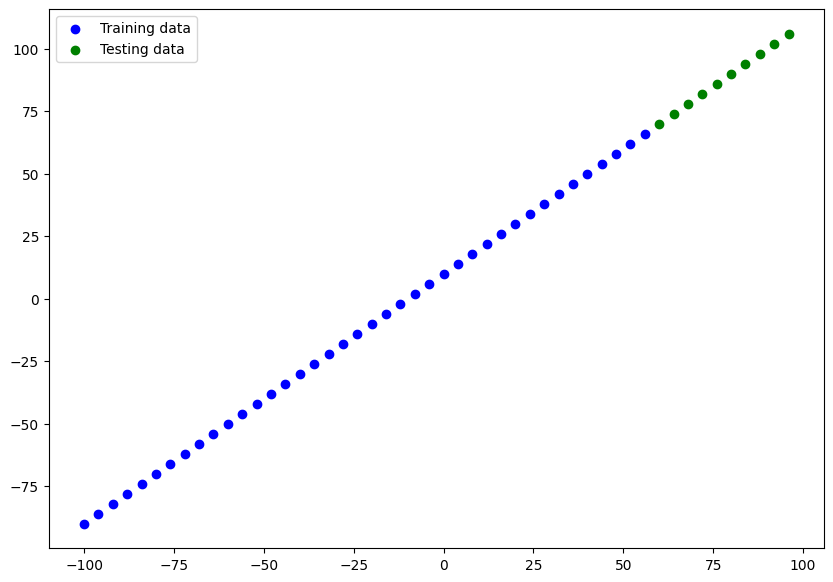

In [29]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show the legend
plt.legend()

###Lets look at how to build NN for our existing data. We did this earlier. But we will recreate again.

In [30]:
#Reshape X_train and X_test to have an added dimension for batch size
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)
#model.build(input_shape=[None, 1])


#Visualizing the model

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Shape of data that we are passing the model


In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
X.shape, y.shape

(TensorShape([50]), TensorShape([50]))

In [34]:
#Lets create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

#create the model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer1"), #Dense means fully connected layer. All neurons connected to all neurons in next layer
    tf.keras.layers.Dense(1, name="output_layer")],name="model_1") #output later with 1 unit to match the shape of y_train

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* **Total Params** - total number of
parameters in the model.
* **Trainable parameters** - These are the parameters (patterns) the model can update as it trains.
* **Non-trainable params**:  These parameters are not updated during training. This is typical when you bring in already learning parameters or patterns from other models during **transfer learning**

🔖 Resources:For more in-depth overview of trainable parameters within layer, checkout MIT's introduction to deep learning video. URL : https://introtodeeplearning.com/

In [35]:
#Lets fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
#Get summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer1 (Dense)                 │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

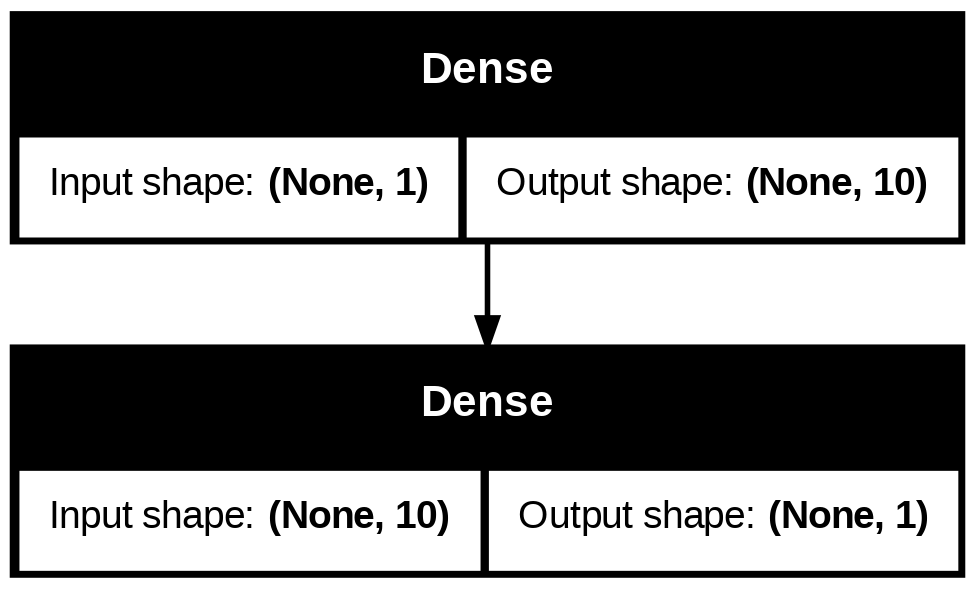

In [37]:
#Lets visualize our model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Visualizing model predictions

To visualize predictions its good idea to plot them against the ground truth labels.

Often you will see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model

In [38]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[41.757843],
       [44.432785],
       [47.107735],
       [49.782677],
       [52.45763 ],
       [55.13257 ],
       [57.807514],
       [60.482456],
       [63.157402],
       [65.832344]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
#Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend()

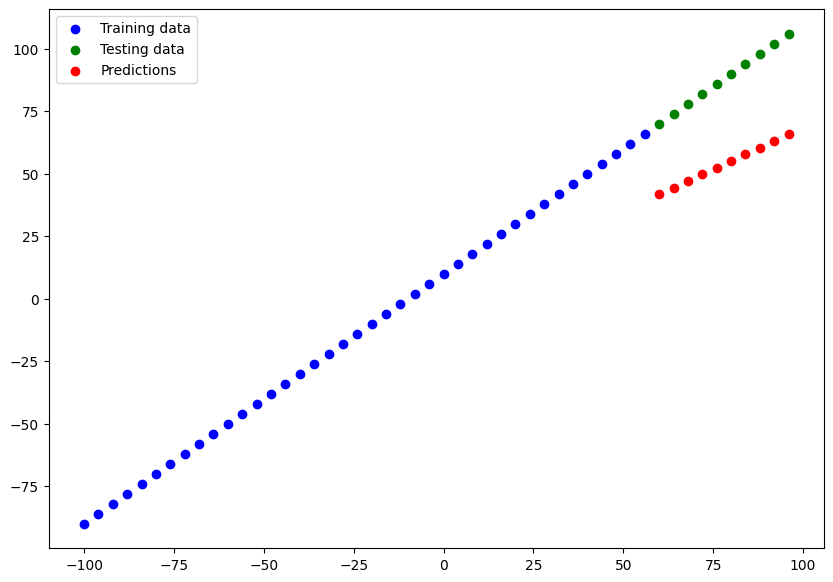

In [41]:
#Plot predictions
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaulation metrics.

Depending on the problem you are working on , there will be different evaluations metrics to evaulate your models performance.

Since we aer working on a regresison, two of the main metrics:

* MAE - Mean absolute error
* MSE - Mean square error

In [42]:
#Evaluate the model on the test set

model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 34.2049 - mae: 34.2049


[34.20490264892578, 34.20490264892578]

In [43]:
# Calculate the MSE
mae = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred)) #Squeeze y_pred to remove extra dimension

mae = tf.reduce_mean(mae) #Compute the average of all errors and store the final result in the variable 'mae'

print("Mean Squared Error:", mae.numpy()) #print the mae value


Mean Squared Error: 1184.4606


Something is wrong. The shape of tensors seems to be issue.

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.757843, 44.432785, 47.107735, 49.782677, 52.45763 , 55.13257 ,
       57.807514, 60.482456, 63.157402, 65.832344], dtype=float32)>

In [46]:
#Calculate the mae
mae = tf.keras.losses.MeanAbsoluteError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae = tf.reduce_mean(mae)
print("Mean Absolute Error:", mae.numpy())

Mean Absolute Error: 34.204903


### Calculate the MSE

In [47]:
# Calculate the mean square error
mse = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.reduce_mean(mse)
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 1184.4606


In [48]:
#again something is wrong here
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.757843, 44.432785, 47.107735, 49.782677, 52.45763 , 55.13257 ,
       57.807514, 60.482456, 63.157402, 65.832344], dtype=float32)>

In [50]:
#Lets recalculate mean square error
mse = tf.keras.losses.MeanSquaredError()(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.reduce_mean(mse)
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 1184.4606


### Running experiments to improve our model
1. Get more data - get more examples for your mdoel to train on (more opportunities to learn patterns or releationships between features and labels).
2. Make your model larger (using  a more complex model) this i might come in the form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of chance to find patterns in the data.  

Lets do three modelling experiments:

1. `model_1` - Same as the original model, 1 layer , trained for 100 epochs.
2. `modle_2` -  This could be two layers trained for 100 epochs.
3. `model_3` - This could be two layers trained for 500 epochs. (500 chances to look at the data)


Build  **model_1**

In [51]:
#set random seet
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

#Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3.Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.5142 - mae: 12.5142 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.4421 - mae: 8.4421
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.1936 - mae: 9.1936
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.2567 - mae: 8.2567
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.9327 - mae: 8.9327
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.9709 - mae: 7.9709
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.6157 - mae: 9.6157
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9530 - mae: 7.9530
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.6041 - mae: 9.6041
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9352 - mae: 7.9352
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.5925 - mae: 9.5925
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9173 - mae: 7.9173
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


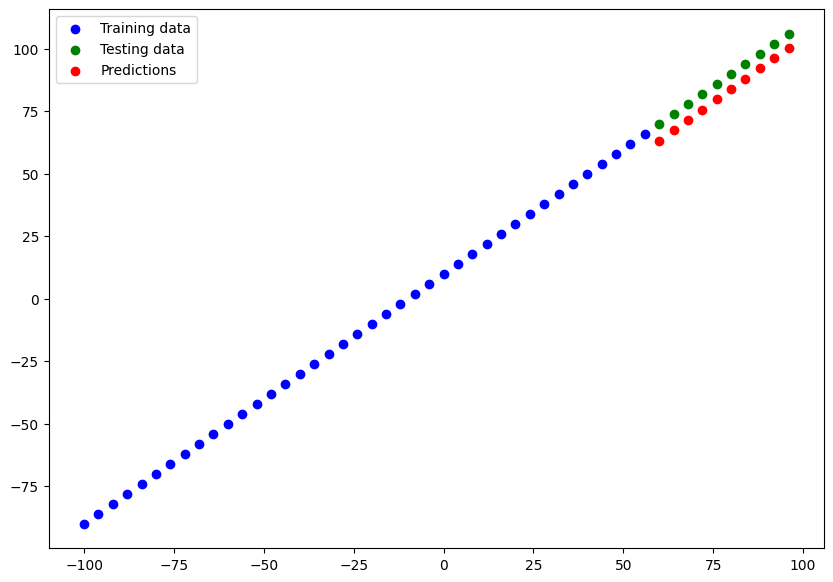

In [52]:
#Make and plot the predictions for model-1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [53]:
# Calculate model_1 evalutation metrics
mae_1 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_preds_1))
tf.constant(mae_1), tf.constant(mse_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.193711280822754>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.48548126220703>)

** Build `model_2` **

* 2 dense layer trained with 100 epochs

In [54]:
#Create random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.7575 - mae: 13.7575
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.8206 - mae: 14.8206
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.3840 - mae: 15.3840
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.9562 - mae: 15.9562
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.8669 - mae: 11.8669
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 16.7860 - mae: 16.7860
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.8385 - mae: 12.8385
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17.1545 - mae: 17.1545
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.2140 - mae: 13.2140
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.5071 - mae: 17.5071
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.5732 - mae: 13.5732 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 17.8445 - mae: 17.8445
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


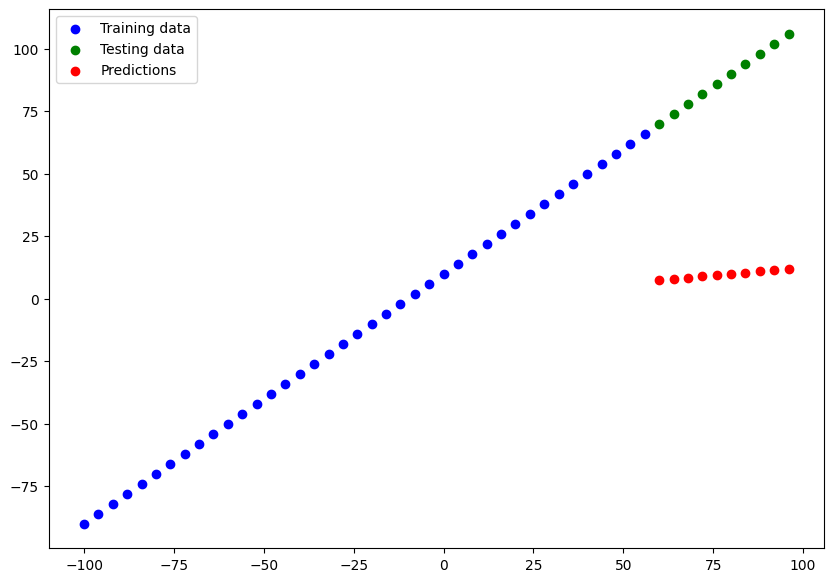

In [55]:
#Make and plot
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [56]:
# Calculate model_2 evaluation metrics
mae_2 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_pred_2))
tf.constant(mae_2), tf.constant(mse_2)

(<tf.Tensor: shape=(), dtype=float32, numpy=78.2555160522461>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6225.00439453125>)

** Build `model_3' **
* 2 layer for 500 epochs

In [57]:
# Set random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit the model
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 22.3069 - mae: 22.3069 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.6439 - mae: 20.6439
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 20.8150 - mae: 20.8150 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 20.6866 - mae: 20.6866
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.8633 - mae: 17.8633
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.4355 - mae: 16.4355
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.4840 - mae: 16.4840
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9092 - mae: 11.9092
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.8003 - mae: 14.8003
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.6642 - mae: 15.6642
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.7710 - mae: 11.7710
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.7502 - mae: 14.7502
Epoch 13/500
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


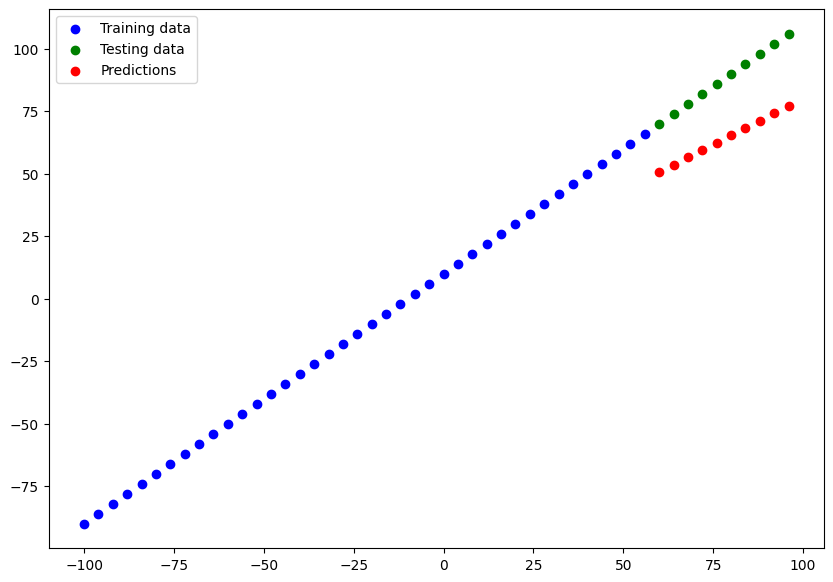

In [58]:
#make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

Looks over model is overfitting here.

In [59]:
#Model 3 evaluationmetrics
mae_3 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_pred_3))
tf.constant(mae_3), tf.constant(mse_3)

(<tf.Tensor: shape=(), dtype=float32, numpy=24.115388870239258>,
 <tf.Tensor: shape=(), dtype=float32, numpy=590.9088745117188>)

** Note: ** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

### Comparing the results of our experiments

We have run a few expriments , lets compare the results.  

In [60]:
#Lets compare the models results using a pandas data frames
import pandas as pd
model_results =  [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,6.193711,38.485481
1,model_2,78.255516,6225.004395
2,model_3,24.115389,590.908875


In [61]:
model_1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Looks like model_1 performed the best

** One of our mail goals is to minimize the time between the experiments **. the more things you figure out , which dont work and in turn , we will get close what does work. It takes lot of trail and error.

** Resource: **
As you build more models, you want to look into using

* TensorBoard - a component of the tensorflow library to help track modelling experiments (we will see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments. Plugs straight into tensor board.



## Saving our models
Saving our models allows us to use them outside of google colab (or whatever they were trained) such  as in a web application or a mobile app.

There are two models to save models
1. The SaveModel Format
2. The HDF5 format



In [63]:
#Save model using SavedModel Format
model_2.save("best_model_SavedModel_format.keras")

In [64]:
#Save model in HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [68]:
#Try loading the SavedModel Format
loaded_model_2 = tf.keras.models.load_model("best_model_SavedModel_format.keras")

#Check if model is loaded properly
loaded_model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (10, 10)                    │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (10, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
#Try loading the HDF5 model format
loaded_model_2 = tf.keras.models.load_model("best_model_HDF5_format.h5")

#Check if model is loaded properly
loaded_model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (10, 10)                    │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (10, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

** Now lets compare the model_2 predictions with saved model format model predictions **

In [70]:
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_model_2_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
model_2_preds, loaded_model_2_preds

(array([[ 7.495757 ],
        [ 7.9954767],
        [ 8.495196 ],
        [ 8.994913 ],
        [ 9.494629 ],
        [ 9.994345 ],
        [10.494066 ],
        [10.993774 ],
        [11.493496 ],
        [11.99322  ]], dtype=float32),
 array([[ 7.495757 ],
        [ 7.9954767],
        [ 8.495196 ],
        [ 8.994913 ],
        [ 9.494629 ],
        [ 9.994345 ],
        [10.494066 ],
        [10.993774 ],
        [11.493496 ],
        [11.99322  ]], dtype=float32))

In [72]:
mae(y_true=y_test, y_pred=model_2_preds), mae(y_true=y_test, y_pred=loaded_model_2_preds)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [79]:
#Lets fix with below code.

# Calculate model_2 evaluation metrics
mae_2 = tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_pred_2))
tf.constant(mae_2), tf.constant(mse_2)

# Calculate MAE for model_2_preds
mae_model_2_preds = tf.keras.losses.MeanAbsoluteError()(y_true=y_test, y_pred=tf.squeeze(model_2_preds))
mae_model_2_preds = tf.reduce_mean(mae_model_2_preds) #Compute the average of all errors and store the final result in the variable 'mae'

# Calculate MAE for loaded_model_2_preds
mae_loaded_model_2_preds = tf.keras.losses.MeanAbsoluteError()(y_true=y_test, y_pred=tf.squeeze(loaded_model_2_preds))
mae_loaded_model_2_preds = tf.reduce_mean(mae_loaded_model_2_preds) #Compute the average of all errors and store the final result in the variable 'mae'

# Print the MAE values
print("Mean Absolute Error (model_2_preds):", mae_model_2_preds.numpy())
print("Mean Absolute Error (loaded_model_2_preds):", mae_loaded_model_2_preds.numpy())

Mean Absolute Error (model_2_preds): 78.255516
Mean Absolute Error (loaded_model_2_preds): 78.255516


In [80]:
#Lets try hf5 format
loaded_model_2 = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (10, 10)                    │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (10, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [81]:
#Lets see if predictions of loaded hd5 format is same as model 2
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_model_2_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

** Download a model (or any other file) from google colab **
If you want to downlaod your file from google colab

1. Go to Files tabs on the left menu and right click on file and click download.

2. Usee code to download the file

3. Save it to google drive by connecting google drive and copying it there.

In [85]:
#Mount google drive. Experiment and comment this out later.
#from google.colab import drive
#drive.mount('/content/drive')

#Unmount google drive
#drive.flush_and_unmount

<function google.colab.drive.flush_and_unmount(timeout_ms=86400000)>

In [82]:
#Download from google colab directly.
from google.colab import files
files.download("best_model_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>